In [195]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [196]:
import torch

In [197]:
# fetch mnist
import gzip
image_file = gzip.open("train-images.gz", 'r')
label_file = gzip.open("train-labels.gz", 'r')

batches = 1000
image_file.read(16); label_file.read(8)
label_buffer = [label_file.read(1) for _ in range(batches)]
image_buffer = image_file.read(28 * 28 * batches)
images = np.frombuffer(image_buffer, dtype=np.uint8).astype(np.float32).reshape(batches, 28, 28)
labels = [np.frombuffer(label, dtype=np.uint8) for label in label_buffer]

array([5], dtype=uint8)

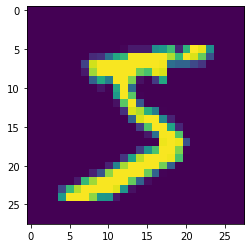

In [198]:
plt.imshow(images[0])
labels[0]

In [199]:
# l1 784 -> 256
# l2 256 -> 9
lr = 0.001
h = 0.00001

In [200]:
def forward(i, w1, w2):
    x = i @ w1
    x = x @ w2
    return x

def loss(got, expected):
    return (expected - got).mean()**2

In [227]:
w1 = torch.randn(784*256, requires_grad=True).reshape(784, 256)
w2 = torch.randn(256*9, requires_grad=True).reshape(256, 9)

losses = []

for i in range(batches):
    x = torch.tensor(images[i].flatten())
    y = torch.tensor(labels[i].item())
    
    ans = forward(x, w1, w2)
    l = loss(ans, y)
    
    losses.append(l.item())
    
    w1.retain_grad()
    w2.retain_grad()
    
    l.backward()
    
    
    

In [228]:
w1.grad

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [235]:
w2.grad

tensor([[-7.0331e+08, -7.0331e+08, -7.0331e+08,  ..., -7.0331e+08,
         -7.0331e+08, -7.0331e+08],
        [ 2.1053e+09,  2.1053e+09,  2.1053e+09,  ...,  2.1053e+09,
          2.1053e+09,  2.1053e+09],
        [-3.8711e+08, -3.8711e+08, -3.8711e+08,  ..., -3.8711e+08,
         -3.8711e+08, -3.8711e+08],
        ...,
        [ 1.1286e+09,  1.1286e+09,  1.1286e+09,  ...,  1.1286e+09,
          1.1286e+09,  1.1286e+09],
        [ 2.9766e+08,  2.9766e+08,  2.9766e+08,  ...,  2.9766e+08,
          2.9766e+08,  2.9766e+08],
        [ 4.0172e+08,  4.0172e+08,  4.0172e+08,  ...,  4.0172e+08,
          4.0172e+08,  4.0172e+08]])

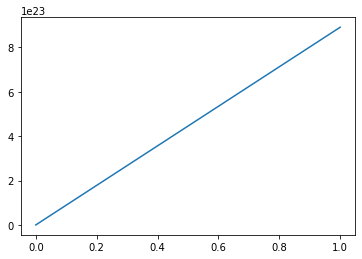

In [202]:
plt.plot(losses)